## Processing Sensor Data from Catalina Jemez CZO BGZOB Pit 2
Marc Berghouse 9/19/2020

This array includes:
- apogee_SO110
- Vaisala_GMM220
- DecagonMPS6
- Decagon5TE
- Vertical redox prodes from Paleo Terra

Issues:
- Apogee temp at 60cm and 100cm has spikes that might need to be masked
- I'm not sure which water potential values are unrealistic

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_co2o2_2014.csv"
infile2 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_co2o2_2015.csv" 
infile3 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_co2o2_2016.csv" 
infile4 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_co2o2_2017.csv" 
infile5 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_soilMTP_2014.csv" 
infile6 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_soilMTP_2015.csv" 
infile7 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_soilMTP_2016.csv" 
infile8 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BGZOB2_soilMTP_2017.csv" 
infile9 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BigelowRedox_2015.csv" 
infile10 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BigelowRedox_2016.csv" 
infile11 = "../../raw_data/Catalina-Jemez/BGZOB_Pit2/BigelowRedox_2017.csv" 
infile12 = "../../raw_data/Catalina-Jemez/Catalina-Jemez_BGZOB_PRISM.csv"

df1 = pd.read_csv(infile1, na_values='NAN',  parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN',  parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN',  parse_dates=[0], index_col=0) 
df5 = pd.read_csv(infile5, na_values='NAN',  parse_dates=[0], index_col=0) 
df6 = pd.read_csv(infile6, na_values='NAN',  parse_dates=[0], index_col=0) 
df7 = pd.read_csv(infile7, na_values='NAN',  parse_dates=[0], index_col=0) 
df8 = pd.read_csv(infile8, na_values='NAN',  parse_dates=[0], index_col=0) 
df9 = pd.read_csv(infile9, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit2_ORP_5','Pit2_ORP_10','Pit2_ORP_30','Pit2_ORP_60']) 
df10 = pd.read_csv(infile10, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit2_ORP_5','Pit2_ORP_10','Pit2_ORP_30','Pit2_ORP_60']) 
df11 = pd.read_csv(infile11, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit2_ORP_5','Pit2_ORP_10','Pit2_ORP_30','Pit2_ORP_60']) 
df12 = pd.read_csv(infile12, na_values=['NAN',-9999,-99999], skiprows=10, parse_dates=[0], index_col=0) 



C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df1=df1.drop(['MST'])
df2=df2.drop(['MST'])
df3=df3.drop(['MST'])
df4=df4.drop(['MST'])
df5=df5.drop(['MST'])
df6=df6.drop(['MST'])
df7=df7.drop(['MST'])
df8=df8.drop(['MST'])
df9=df9.drop(['MST'])
df10=df10.drop(['MST'])
df11=df11.drop(['MST'])

df4

,TempSO1(10cm),TempSO2(30cm),TempSO3(60cm),TempSO4(100cm),O2soil1(10cm),O2soil2(30cm),O2soil3(60cm),O2soil4(100cm),CO2soil1(10cm),CO2soil2(30cm),CO2soil3(60cm),CO2soil4(100cm)
TIMESTAMP,,,,,,,,,,,,
1/1/2017 0:00,2.341,4.101,4.736,5.456,17.092,18.392,14.045,11.592,2574.963,4103.325,2193.621,2949.585
1/1/2017 0:15,2.33,4.079,4.736,5.455,17.093,18.393,14.039,11.591,2569.969,4112.041,2208.512,2950.856
1/1/2017 0:30,2.321,4.065,4.736,5.456,17.094,18.394,14.039,11.57,2591.125,4127.931,2197.616,2943.411
1/1/2017 0:45,2.32,4.056,4.736,5.456,17.094,18.388,14.039,11.553,2593.394,4127.931,2173.465,2945.409
1/1/2017 1:00,2.32,4.041,4.733,5.456,17.094,18.356,14.012,11.552,2595.392,4132.924,2185.086,2941.051
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2017 22:45,5.886,6.983,6.817,7.292,17.509,19.474,19.535,21.530,940.413,1583.027,2738.552,3025.550
12/31/2017 23:00,5.865,6.983,6.817,7.293,17.511,19.475,19.539,21.530,935.693,1582.119,2735.284,3031.177
12/31/2017 23:15,5.845,6.983,6.822,7.292,17.511,19.475,19.538,21.530,937.599,1580.939,2754.889,3028.999


In [3]:
#df9=df9.loc[0:4]
df10

,Pit2_ORP_5,Pit2_ORP_10,Pit2_ORP_30,Pit2_ORP_60
DateTime,,,,
1/1/2016 0:00,498.4,554.9,604.6,590.6
1/1/2016 0:15,498.4,554.5,604.6,591
1/1/2016 0:30,498.4,554.9,604.6,591
1/1/2016 0:45,499.1,555.2,604.6,591
1/1/2016 1:00,499.1,555.2,604.6,591
...,...,...,...,...
12/31/2016 22:45,581.3,590.2,616.4,572.2
12/31/2016 23:00,581.7,589.9,616.7,572.5
12/31/2016 23:15,581.3,590.2,616.4,572.2


In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], sort=False)
df.columns=['ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'ApogeeTemp_100cm.deg.C', 'O2_10cm.percent.0-100','O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'O2_100cm.percent.0-100', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'CO2_100cm.ppm', 'WaterPotential_10cm.kPa','WaterPotential_30cm.kPa', 'DecagonMPS6Temp_10cm.deg.C','DecagonMPS6Temp_30cm.deg.C', 'SoilMoisture_10cm.m3m3', 'SoilMoisture_30cm.m3m3', 'SoilMoisture_60cm.m3m3', 'SoilMoisture_100cm.m3m3', 'BulkEC_10cm.dS/m', 'BulkEC_30cm.dS/m', 'BulkEC_60cm.dS/m', 'BulkEC_100cm.dS/m', 'Decagon5TETemp_10cm.deg.C','Decagon5TETemp_30cm.deg.C', 'Decagon5TETemp_60cm.deg.C', 'Decagon5TETemp_100cm.deg.C','ReductionPotential_5cm.mV', 'ReductionPotential_10cm.mV', 'ReductionPotential_30cm.mV', 'ReductionPotential_60cm.mV', 'PRISM_precim.mm' ]

df

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_100cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_100cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,BulkEC_100cm.dS/m,Decagon5TETemp_10cm.deg.C,Decagon5TETemp_30cm.deg.C,Decagon5TETemp_60cm.deg.C,Decagon5TETemp_100cm.deg.C,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precim.mm
11/20/2014 11:30,9.345,4.634,5.723,7.146,20.531,19.676,19.076,19.02,1153.082,3155.473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 11:45,9.833,4.995,6.072,7.525,21.2,20.306,19.696,19.638,1170.156,3244.766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:00,8.668,5.114,6.143,7.585,20.953,20.302,19.692,19.634,1154.281,3224.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:15,7.769,5.161,6.165,7.598,20.918,20.299,19.692,19.623,1154.938,3211.153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:30,7.455,5.195,6.166,7.597,20.891,20.289,19.708,19.622,1145.84,3194.224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
#Corrections to whole DataFrame

df=df.astype(float)
df['WaterPotential_10cm.kPa']=abs(df['WaterPotential_10cm.kPa'])
df['WaterPotential_30cm.kPa']=abs(df['WaterPotential_30cm.kPa'])
df.mask(df<=-0.01, inplace=True)


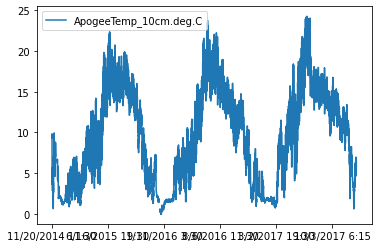

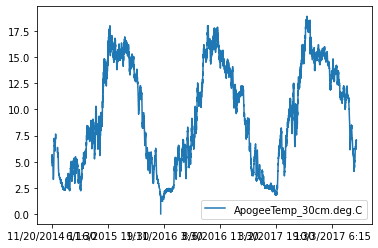

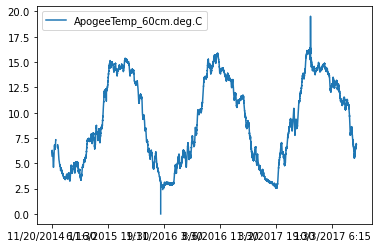

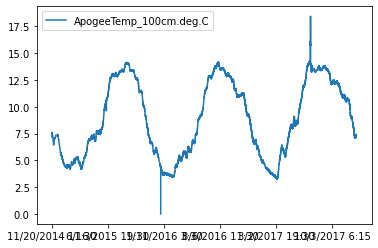

In [6]:
plt.show()
df.plot(use_index=True, y='ApogeeTemp_10cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_30cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_100cm.deg.C')

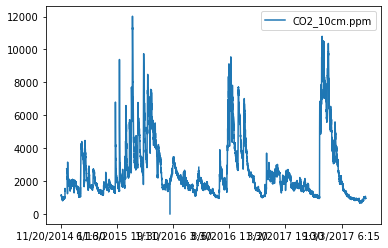

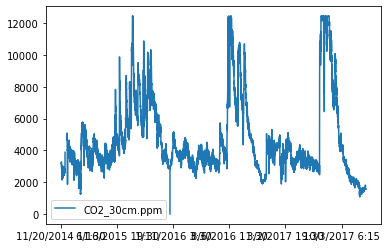

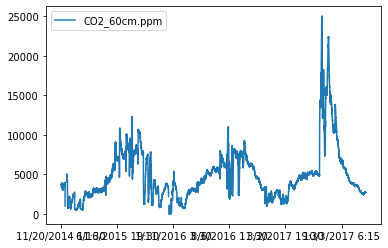

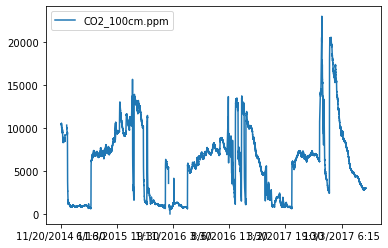

In [7]:
#Plot CO2 data


plt.show()
df.plot(use_index=True, y='CO2_10cm.ppm')
df.plot(use_index=True, y='CO2_30cm.ppm')
df.plot(use_index=True, y='CO2_60cm.ppm')
df.plot(use_index=True, y='CO2_100cm.ppm')



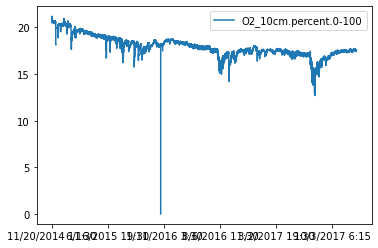

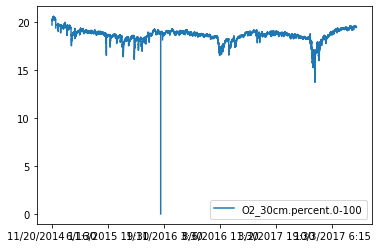

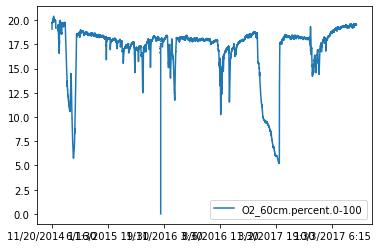

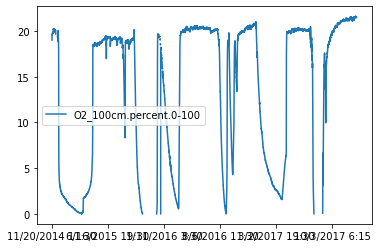

In [8]:
plt.show()
df.plot(use_index=True, y='O2_10cm.percent.0-100')
df.plot(use_index=True, y='O2_30cm.percent.0-100')
df.plot(use_index=True, y='O2_60cm.percent.0-100')
df.plot(use_index=True, y='O2_100cm.percent.0-100')

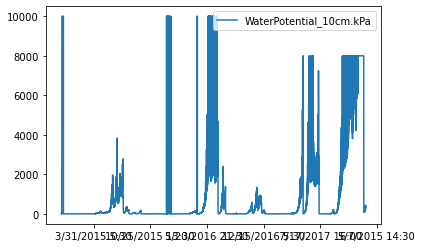

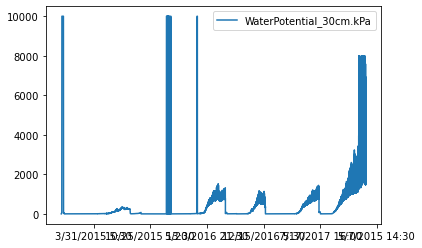

In [9]:
plt.show()
df.plot(use_index=True, y='WaterPotential_10cm.kPa')
df.plot(use_index=True, y='WaterPotential_30cm.kPa')

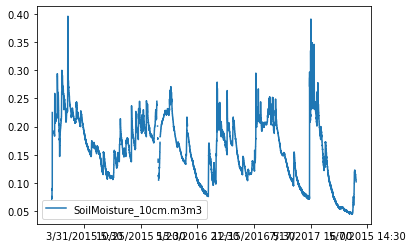

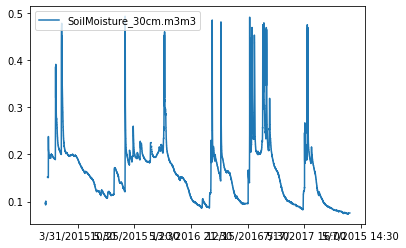

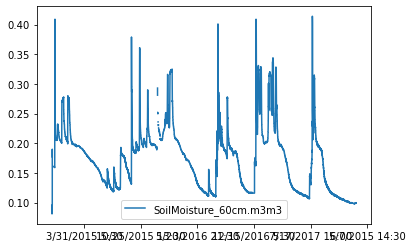

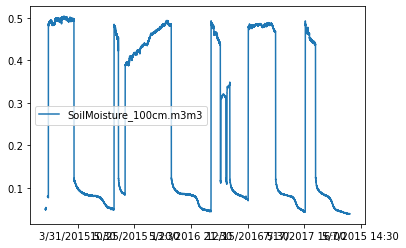

In [10]:
plt.show()
df.plot(use_index=True, y='SoilMoisture_10cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_30cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_60cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_100cm.m3m3')

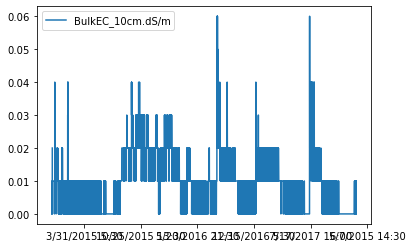

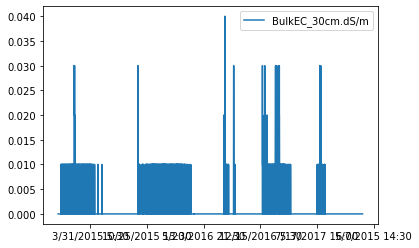

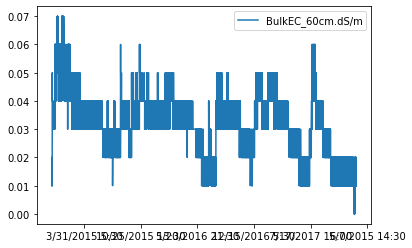

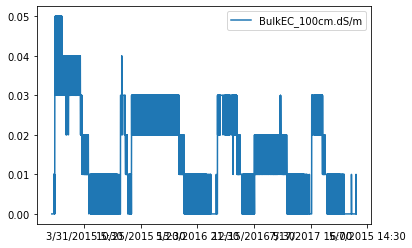

In [11]:
plt.show()
df.plot(use_index=True, y='BulkEC_10cm.dS/m')
df.plot(use_index=True, y='BulkEC_30cm.dS/m')
df.plot(use_index=True, y='BulkEC_60cm.dS/m')
df.plot(use_index=True, y='BulkEC_100cm.dS/m')

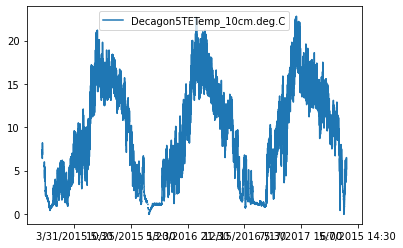

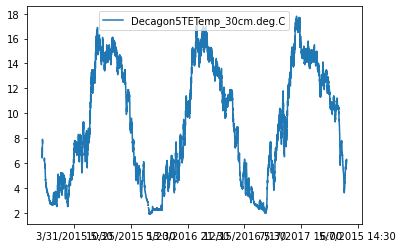

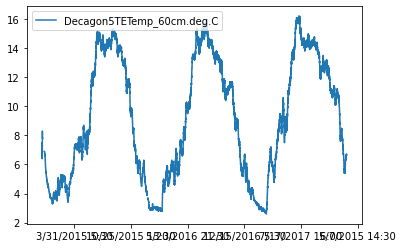

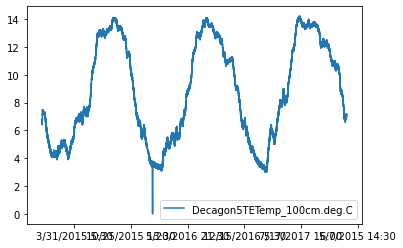

In [12]:
plt.show()
df.plot(use_index=True, y='Decagon5TETemp_10cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_30cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_60cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_100cm.deg.C')

In [13]:
df=df.drop(columns='Decagon5TETemp_10cm.deg.C')
df=df.drop(columns='Decagon5TETemp_30cm.deg.C')
df=df.drop(columns='Decagon5TETemp_60cm.deg.C')
df=df.drop(columns='Decagon5TETemp_100cm.deg.C')

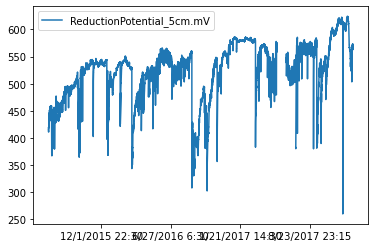

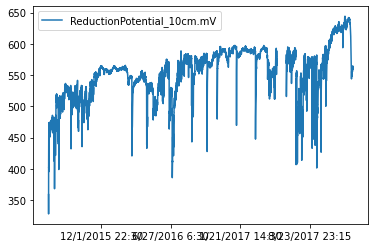

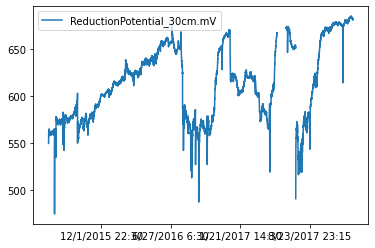

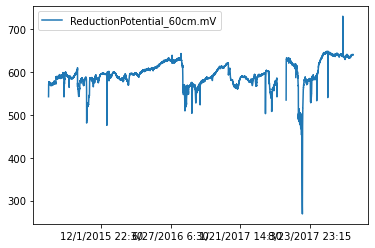

In [14]:
plt.show()
df.plot(use_index=True, y='ReductionPotential_5cm.mV')
df.plot(use_index=True, y='ReductionPotential_10cm.mV')
df.plot(use_index=True, y='ReductionPotential_30cm.mV')
df.plot(use_index=True, y='ReductionPotential_60cm.mV')

In [15]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Catalina-Jemez/BGZOB_Pit2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [16]:
output

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_100cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_100cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,SoilMoisture_100cm.m3m3,BulkEC_10cm.dS/m,BulkEC_30cm.dS/m,BulkEC_60cm.dS/m,BulkEC_100cm.dS/m,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precim.mm
11/20/2014 11:30,9.345,4.634,5.723,7.146,20.531,19.676,19.076,19.020,1153.082,3155.473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 11:45,9.833,4.995,6.072,7.525,21.200,20.306,19.696,19.638,1170.156,3244.766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:00,8.668,5.114,6.143,7.585,20.953,20.302,19.692,19.634,1154.281,3224.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:15,7.769,5.161,6.165,7.598,20.918,20.299,19.692,19.623,1154.938,3211.153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 12:30,7.455,5.195,6.166,7.597,20.891,20.289,19.708,19.622,1145.840,3194.224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
